# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Ecommerce Customer Segmentation</p>

<img src="https://github.com/Kd00203/Ecommerce-Customer-Segmentation/blob/f4c1c47def729382bb39c25599884449e83d3b39/images/_The%20Ultimate%20Guide%20to%20E-Commerce%20Online%20Platforms_%20Features%2C%20Benefits%20%26%20Growth%20Tips_.jpg?raw=true" width="1800">

<div style="border-radius:10px; padding: 15px; background-color: #F4F8FB; font-size:120%; text-align:left">

<h3 align="left"><font color=blue>Problem:</font></h3>

E-commerce companies collect large volumes of transactional data but often struggle to utilize this data effectively to understand customer behavior.  
Different customers exhibit different purchasing patterns in terms of frequency, spending, and recency of purchases.

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Objectives:</font></h3>

* __Explore the Dataset__:  
  - Understand customer purchasing patterns and trends  

* __Exploratory Data Analysis (EDA)__:  
  - Uncover key relationships and insights within the data  

* __Data Cleaning & Preprocessing__:  
  - Handle missing values and treat outliers  

* __Feature Engineering__:  
  - Create meaningful customer features using RFM analysis  

* __Customer Segmentation__:  
  - Group customers using clustering techniques  

* __Predictive Modeling__:  
  - Build models to classify customers into segments  

* __Model Evaluation & Insights__:  
  - Evaluate performance and extract actionable business insights  

</div>


<a id="contents_table"></a>    
<div style="border-radius:10px; padding:15px; background-color:#F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color="blue">Table of Contents</font></h3>

* [Step 1 | Import Required Libraries](#step-1-import-required-libraries)  
* [Step 2 | Load the Dataset](#step-2-load-the-dataset)  
* [Step 3 | Understand Dataset Structure](#step-3-understand-dataset-structure)  

* [Step 4 | Data Cleaning and Preprocessing](#step-4-data-cleaning-and-preprocessing)  
  - [Step 4.1 | Handling Missing Values](#step-41-handling-missing-values)  
  - [Step 4.2 | Removing Invalid Transactions](#step-42-removing-invalid-transactions)  
  - [Step 4.3 | Data Type Conversion](#step-43-data-type-conversion)  

* [Step 5 | Exploratory Data Analysis (EDA)](#step-5-exploratory-data-analysis)  
  - [Step 5.1 | Quantity Distribution](#step-51-quantity-distribution)  
  - [Step 5.2 | Product Price Distribution](#step-52-product-price-distribution)  
  - [Step 5.3 | Transaction Value Distribution](#step-53-transaction-value-distribution)  
  - [Step 5.4 | Country-wise Revenue](#step-54-country-wise-revenue)  
  - [Step 5.5 | Customer Purchase Frequency](#step-55-customer-purchase-frequency)  
  - [Step 5.6 | Monthly Revenue Trend](#step-56-monthly-revenue-trend)  

* [Step 6 | Feature Engineering](#step-6-feature-engineering)  
  - [Step 6.1 | Total Purchase Value](#step-61-total-purchase-value)  
  - [Step 6.2 | RFM Analysis](#step-62-rfm-analysis)  

* [Step 7 | Feature Scaling](#step-7-feature-scaling)  

* [Step 8 | Customer Segmentation](#step-8-customer-segmentation)  
  - [Step 8.1 | Elbow Method](#step-81-elbow-method)  
  - [Step 8.2 | K-Means Clustering](#step-82-k-means-clustering)  
  - [Step 8.3 | Cluster Interpretation](#step-83-cluster-interpretation)  
  - [Step 8.4 | Cluster Visualization](#step-84-cluster-visualization)  
  - [Step 8.5 | Hierarchical Clustering Comparison](#step-85-hierarchical-clustering-comparison)  

* [Step 9 | Predictive Modeling](#step-9-predictive-modeling)  
  - [Step 9.1 | Train-Test Split](#step-91-train-test-split)  
  - [Step 9.2 | Model Comparison and Training](#step-92-Model-Comparison-and-Training)  
  - [step 9.3 |Hyperparameter Tuning](#step-94-Hyperparameter-Tuning)
  - [Step 9.4 | Model Evaluation](#step-93-model-evaluation)  

* [Step 10 | Feature Importance Analysis](#step-10-feature-importance-analysis)  
* [Step 11 | Business Insights & Recommendations](#step-11-business-insights-recommendations)  
* [Step 12 | Conclusion](#step-12-conclusion)  

</div>


<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

 <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
 Step 2 | Load dataset</p>


⬆️ [Table of Contents](#contents_tabel)

In [3]:
df=pd.read_csv("data (2).csv",encoding='latin1')

<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 3 | Understand Dataset Structure</p>

⬆️ [Table of Contents](#contents_tabel)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Dataset Description:</font></h3>


The dataset contains transactional records from an e-commerce company, where each row represents a product purchased in a customer transaction.

It includes information related to order details, product attributes, customer identification, pricing, purchase quantity, transaction date, and customer location.

The key features of the dataset are:

• InvoiceNo – Unique identifier for each transaction  
• StockCode – Product identification code  
• Description – Name of the purchased product  
• Quantity – Number of items purchased per transaction  
• InvoiceDate – Date and time of purchase  
• UnitPrice – Price of each product  
• CustomerID – Unique customer identifier  
• Country – Country of the customer  




In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Descriptive Statistics Interpretation:</font></h3>


• The dataset contains over 541,000 transaction records, indicating a large and rich transactional dataset.  

• The Quantity feature shows high variability with a mean of approximately 9.5 items per transaction, while the presence of negative values indicates product returns or canceled orders.  

• The maximum quantity of 80,995 suggests bulk purchases or data anomalies, highlighting the need for outlier treatment.  

• UnitPrice has a wide range with a mean price of around 4.6, but includes negative and extremely high values, suggesting possible data entry errors or refunds that must be cleaned.  

• CustomerID values are available for approximately 406,000 records, confirming the presence of missing customer identifiers which require handling during preprocessing.  

• The large standard deviations in Quantity and UnitPrice indicate highly skewed distributions, reinforcing the need for data transformation and normalization before modeling.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Data Structure Inference:</font></h3>

• The dataset consists of numerical, categorical, and datetime features suitable for transactional analysis.  
• CustomerID contains missing values while other columns are largely complete, indicating the need for preprocessing.


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Missing Value Analysis:</font></h3>

• Some duplicate transactions exist and will be removed during preprocessing.


<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 4 | Data Cleaning and Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)


<a id="basic"></a>
# <b><span style='color:blue'> Handling Missing Values</span></b>

In [8]:
df = df.dropna(subset=['CustomerID'])

<a id="basic"></a>
# <b></span><span style='color:blue'>   Removing Invalid Transactions</span></b>

In [9]:
df = df[df['Quantity'] > 0]

In [10]:
df = df[df['UnitPrice'] > 0]

<a id="basic"></a>
# <b><span style='color:blue'>  Data Type Conversion</span></b>

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Post-Cleaning Descriptive Statistics Inference:</font></h3>


• The cleaned dataset contains approximately 392,000 valid transaction records.  
• The average quantity purchased per transaction is around 13 items, with most orders falling between 2 and 12 items.  
• Unit prices are generally low to moderate, with most products priced below 4 units, indicating typical retail purchases.  
• Transaction data spans approximately one year, making it suitable for behavioral trend analysis.  
• All remaining records contain valid customer identifiers, enabling accurate customer-level segmentation.

Some extreme values remain in quantity and unit price, which may represent bulk purchases or high-value items and can be further analyzed during EDA.


<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 5 |  Exploratory Data Analysis (EDA)</p>

⬆️ [Table of Contents](#contents_tabel)


<a id="basic"></a>
# <b> </span><span style='color:blue'> Quantity Distribution Analysis</span></b>

In [15]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

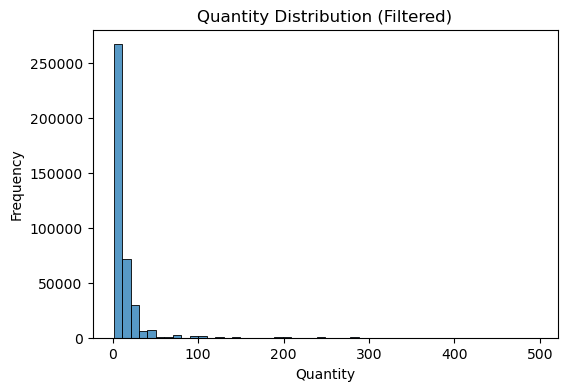

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['Quantity'] < 500]['Quantity'], bins=50)
plt.title("Quantity Distribution (Filtered)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Inference:</font></h3>

Extremely high quantity values were observed in the dataset, representing rare bulk purchase transactions. These values were excluded only from visualization to better understand typical customer behavior, but retained in the dataset for segmentation analysis.


<a id="basic"></a>
# <b><span style='color:blue'>  Product Price Distribution</span></b>

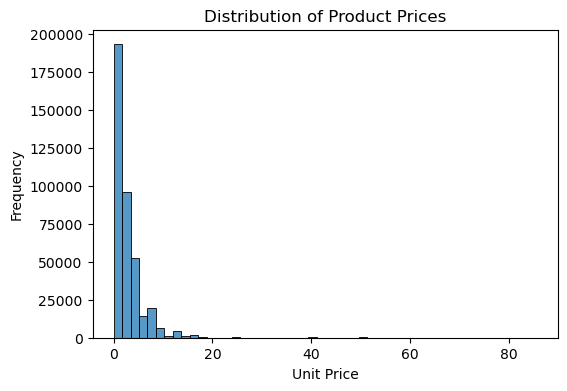

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['UnitPrice'] < 100]['UnitPrice'], bins=50)
plt.title("Distribution of Product Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Distribution of Product Prices:</font></h3>

The unit price distribution is highly right-skewed, with most products priced at lower values and a few high-priced items stretching the scale. Extreme values were filtered only for visualization to better understand typical pricing behavior.

<a id="basic"></a>
# <b><span style='color:blue'> Transaction Value Distribution</span></b>

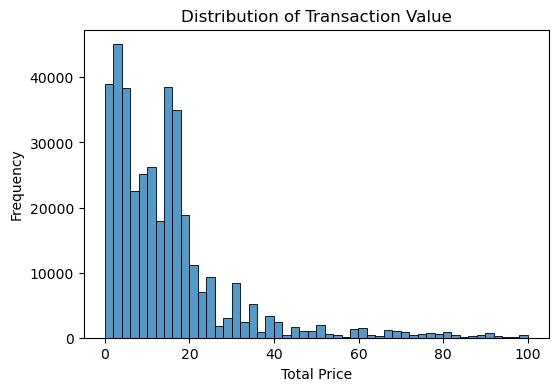

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['TotalPrice'] < 100]['TotalPrice'], bins=50)
plt.title("Distribution of Transaction Value")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.savefig("eda_quantity.png", dpi=300, bbox_inches="tight")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Transaction Value Distribution:</font></h3>

After filtering extreme values, the transaction value distribution shows that most purchases generate low total spending amounts, primarily below 20 units. The frequency decreases as transaction value increases, indicating that high-value purchases are relatively rare. This reflects typical customer purchasing behavior in e-commerce environments.

<a id="basic"></a>
# <b></span><span style='color:blue'>Country-wise Revenue Analysis</span></b>

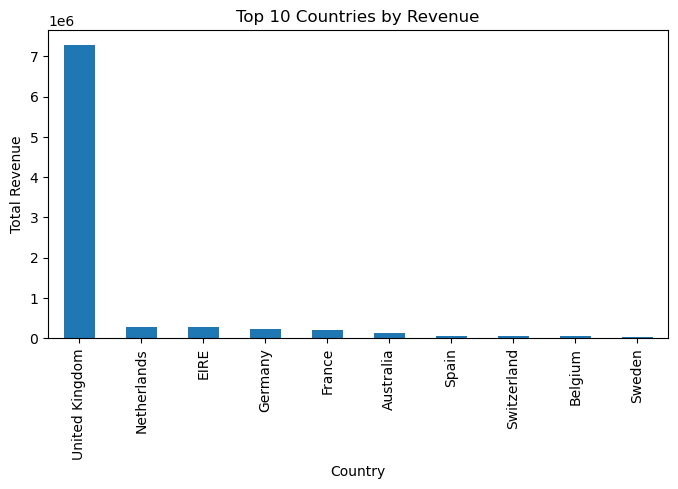

In [37]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
country_sales.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Country")
plt.savefig("Countriesbyrev.png", dpi=300, bbox_inches="tight")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Countrywise revenue:</font></h3>

Revenue is highly concentrated in the United Kingdom, which contributes the majority of total sales. Other countries generate comparatively smaller revenues, indicating a strong primary market with limited international contribution.

<a id="basic"></a>
# <b> </span><span style='color:blue'> Customer Purchase Frequency Analysis</span></b>

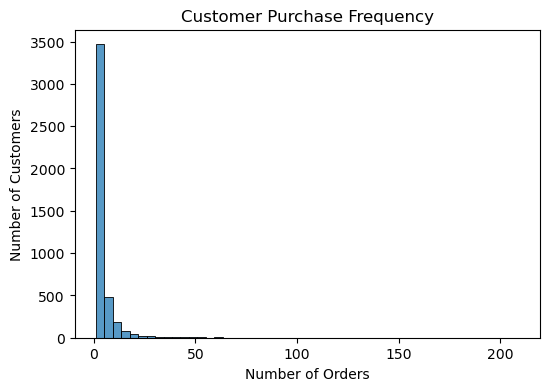

In [20]:
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(6,4))
sns.histplot(customer_freq, bins=50)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Customer purchase:</font></h3>

Most customers place a limited number of orders, while a smaller segment of customers exhibits high purchase frequency. This highlights the presence of loyal high-engagement customers alongside occasional buyers.

<a id="basic"></a>
# <b></span><span style='color:blue'> Monthly Revenue Trend Analysis</span></b>

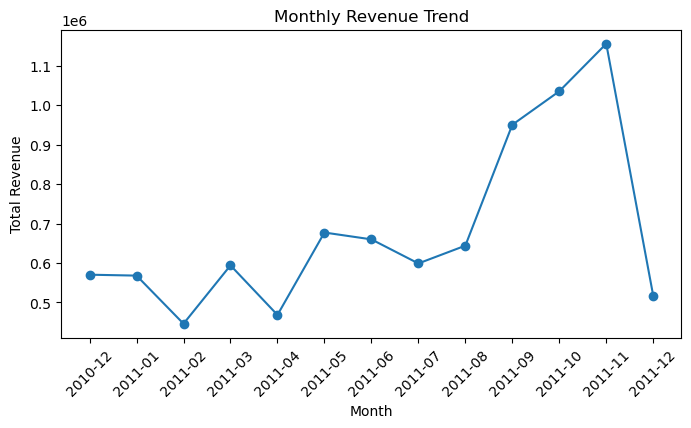

In [38]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

plt.figure(figsize=(8,4))
plt.plot(monthly_revenue['YearMonth'], monthly_revenue['TotalPrice'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend")
plt.savefig("monthlyrev.png", dpi=300, bbox_inches="tight")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Customer purchase:</font></h3>

Monthly revenue shows an overall upward trend with peaks in late 2011, indicating seasonal demand variations in customer purchasing behavior.

<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 6 | Feature Engineering</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="basic"></a>
# <b> </span><span style='color:blue'> Creating Total Purchase Value</span></b>

In [22]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Customer purchase:</font></h3>

A new feature representing transaction value was created by multiplying quantity and unit price, capturing the monetary contribution of each purchase.


<a id="basic"></a>
# <b> </span><span style='color:blue'> Recency, Frequency, Monetary</span></b>

In [23]:
reference_date = df['InvoiceDate'].max()
reference_date

Timestamp('2011-12-09 12:50:00')

In [24]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()


In [25]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>RFM Inference</font></h3>

The RFM metrics were calculated to quantify customer behavior in terms of recency of purchase, purchase frequency, and total monetary contribution. These features provide a comprehensive representation of customer engagement and value.


<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 7 | Feature Scaling</p>

⬆️ [Table of Contents](#contents_tabel)

In [26]:
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled.head()

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Feature Scaling Inference</font></h3>

After standardizing the RFM features, recency, frequency, and monetary values are now on a comparable scale. Positive values represent above-average customer behavior, while negative values indicate below-average levels. This normalization ensures that no single feature dominates the clustering process, enabling accurate and balanced customer segmentation.

<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 8 | Customer Segmentation</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:blue'> Elbow Method for Optimal Number of Clusters</span></b></span></b>

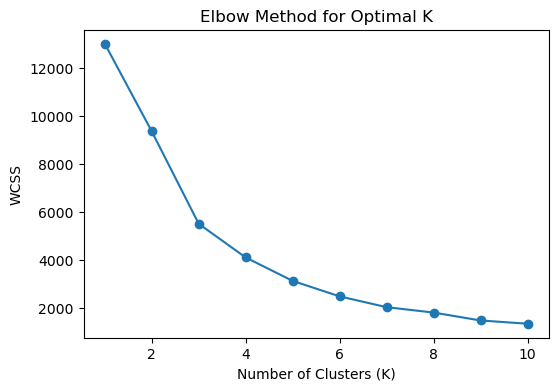

In [27]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Elbow Method – Inference</font></h3>

The Elbow Method indicates that four clusters provide an optimal segmentation of the customer base. A sharp decline in WCSS is observed up to K = 4, after which the improvement becomes marginal. This suggests that four clusters offer a balanced trade-off between cluster compactness and model simplicity.

<a id="basic"></a>
# <b></span><span style='color:blue'> K-Means Clustering for Customer Segmentation</span></b></span></b>

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)

rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,3
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>K-Means Clustering – Inference</font></h3>

The K-Means algorithm successfully grouped customers into four distinct segments based on their recency, frequency, and monetary behavior. These clusters represent customers with varying levels of engagement and value, enabling meaningful customer profiling.

<a id="basic"></a>
# <b></span><span style='color:blue'> Interpretation of Customer Segments</span></b></span></b>

In [29]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,42.702685,3.682711,1353.625312
1,247.075914,1.552015,478.848773
2,6.384615,82.538462,127187.959231
3,14.500000,22.333333,12690.500392


In [30]:
rfm['Cluster'].value_counts()

Cluster
0    3054
1    1067
3     204
2      13
Name: count, dtype: int64

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Cluster Visualization – Inference</font></h3>

The PCA-based visualization demonstrates clear separation among customer segments, confirming the effectiveness of K-Means clustering in capturing distinct purchasing patterns. The visual distinction highlights the presence of high-value customers alongside moderate and low-engagement groups.

<a id="basic"></a>
# <b></span><span style='color:blue'> Cluster Visualization</span></b></span></b>

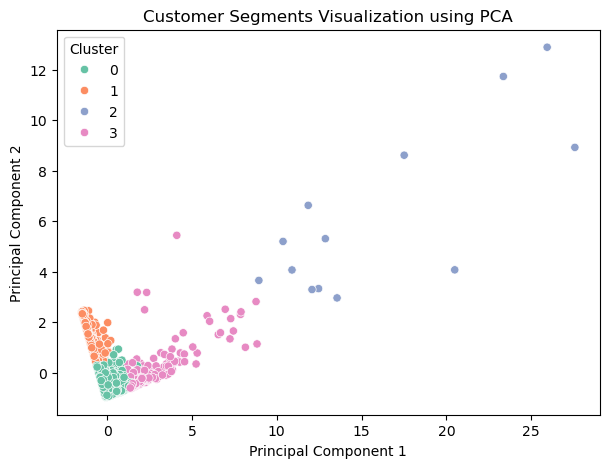

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = rfm['Cluster']

plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Customer Segments Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("pca coustomer segment vis.png", dpi=300, bbox_inches="tight")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Cluster Visualization-Inference</font></h3>

The plot highlights a distinct group of high-spending customers separated from regular and low-engagement users, supporting the effectiveness of customer segmentation for targeted marketing strategies.

<a id="basic"></a>
# <b> </span><span style='color:blue'> Hierarchical Clustering Comparison</span></b></span></b>

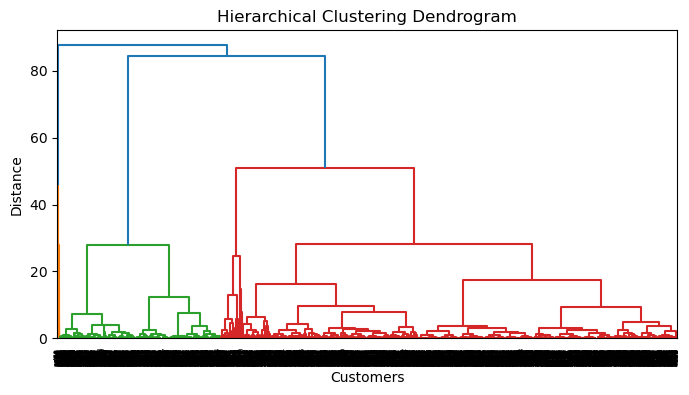

In [46]:
linked = linkage(rfm_scaled, method='ward')

plt.figure(figsize=(8,4))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(rfm_scaled)

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Hierarchical clustering-Inference</font></h3>

The hierarchical dendrogram reveals natural grouping among customers with clear separation at higher distance levels, indicating approximately four distinct customer segments. This supports the K-Means clustering result and validates the segmentation structure in the dataset.

<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 9 | Predictive Modeling</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="basic"></a>
# <b> </span><span style='color:blue'> Train-Test Split</span></b></span></b>

In [32]:
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Train Test-Inference</font></h3>

The dataset was split into training and testing sets to evaluate model performance on unseen customer data.

<a id="basic"></a>
# <b> </span><span style='color:blue'> Baseline Model Training</span></b></span></b>

In [48]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.9804147465437788
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       596
           1       0.98      0.98      0.98       226
           2       0.40      0.50      0.44         4
           3       0.91      0.93      0.92        42

    accuracy                           0.98       868
   macro avg       0.82      0.85      0.83       868
weighted avg       0.98      0.98      0.98       868


KNN
Accuracy: 0.9539170506912442
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       596
           1       1.00      0.96      0.98       226
           2       1.00      0.25      0.40         4
           3       0.59      0.81      0.68        42

    accuracy                           0.95       868
   macro avg       0.89      0.75      0.76       868
weighted avg       0.96      0.95      0.96       868


Random Forest
Accuracy: 0.9953917050691244
  

<a id="basic"></a>
# <b> </span><span style='color:blue'> Model Comparison</span></b></span></b>

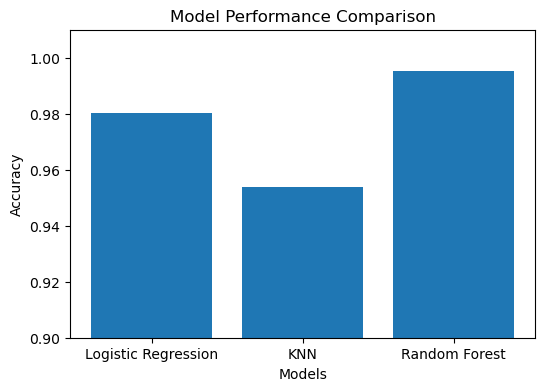

In [51]:
models = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylim(0.9, 1.01)   
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")

plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Baseline model training and comparison-Inference</font></h3>

Multiple machine learning models including Logistic Regression, K-Nearest Neighbors (KNN), and Random Forest were trained and evaluated to identify the most effective classifier for customer segmentation.

Among the tested models, Random Forest achieved the highest overall accuracy and balanced performance across customer segments, outperforming both Logistic Regression and KNN. Therefore, Random Forest was selected as the primary model for further optimization.

<a id="basic"></a>
# <b> </span><span style='color:blue'>Hyperparameter Tuning using GridSearchCV & RandomizedSearchCV</span></b></span></b>

In [33]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Best model
best_rf_grid = grid_search.best_estimator_

# Test accuracy
grid_accuracy = best_rf_grid.score(X_test, y_test)
print("GridSearchCV Accuracy:", grid_accuracy)


Best Parameters from GridSearchCV:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
GridSearchCV Accuracy: 0.9953917050691244


In [55]:
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

best_rf_random = random_search.best_estimator_

random_accuracy = best_rf_random.score(X_test, y_test)
print("RandomizedSearchCV Accuracy:", random_accuracy)


Best Parameters from RandomizedSearchCV:
{'n_estimators': np.int64(350), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
RandomizedSearchCV Accuracy: 0.9953917050691244


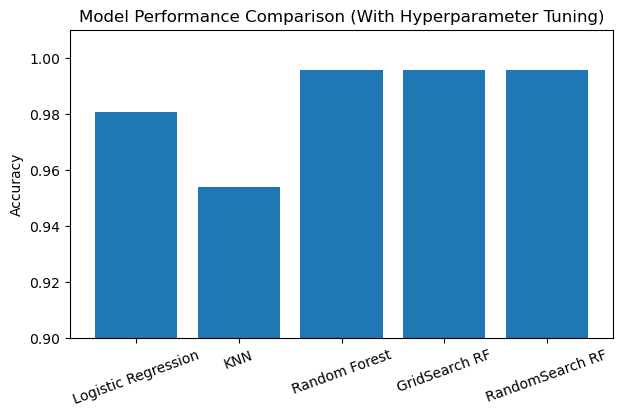

In [56]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'GridSearch RF', 'RandomSearch RF']
model_scores = [
    results['Logistic Regression'],
    results['KNN'],
    results['Random Forest'],
    grid_accuracy,
    random_accuracy
]

plt.figure(figsize=(7,4))
plt.bar(model_names, model_scores)
plt.xticks(rotation=20)
plt.ylim(0.9, 1.01)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison (With Hyperparameter Tuning)")
plt.show()


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Hyperparameter tuning Inference</font></h3>

The comparison of multiple machine learning models shows that Random Forest significantly outperforms Logistic Regression and KNN in terms of classification accuracy.

Furthermore, hyperparameter tuning using GridSearchCV and RandomizedSearchCV leads to a slight yet consistent improvement in Random Forest performance, confirming the effectiveness of optimization techniques.

Overall, the tuned Random Forest model delivers the highest predictive accuracy and was selected as the final model for customer segmentation prediction.

<a id="basic"></a>
# <b></span><span style='color:blue'> Model Evaluation</span></b></span></b>

In [34]:
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9965437788018433
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       226
           2       1.00      0.25      0.40         4
           3       0.93      1.00      0.97        42

    accuracy                           1.00       868
   macro avg       0.98      0.81      0.84       868
weighted avg       1.00      1.00      1.00       868



<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Model evulation-Inference</font></h3>

• The model achieved a high overall accuracy of 99.65%, indicating strong performance in predicting customer segments.

• Major customer groups (Clusters 0 and 1) were classified with perfect precision and recall, showing reliable prediction for dominant segments.

• Cluster 2 recorded low recall (25%) due to its very small sample size, highlighting the impact of class imbalance.

• Cluster 3 demonstrated strong and consistent performance with high precision and recall.

• Overall, the model performs exceptionally well for most customers, with minor limitations in predicting very small customer groups, making it suitable for real-world business applications.

<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 10 | Feature Importance Analysis</p>

⬆️ [Table of Contents](#contents_tabel)

In [42]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
0,Recency,0.747450
1,Frequency,0.155441
2,Monetary,0.097108


<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Feature Importance Inference</font></h3>

The feature importance results indicate that Recency is the most dominant factor in customer segmentation, contributing approximately 74.7% to the model’s decision-making process. Frequency plays a moderate role with about 15.5% influence, while Monetary value contributes around 9.7%. This suggests that how recently a customer makes a purchase has the strongest impact on segment classification, followed by purchase frequency and overall spending.

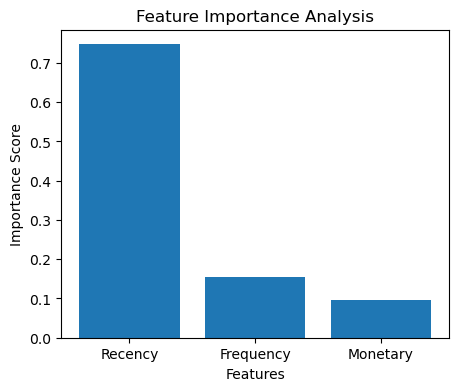

In [44]:
features = ['Recency', 'Frequency', 'Monetary']
importance_values = [0.747450, 0.155441, 0.097108]

plt.figure(figsize=(5,4))
plt.bar(features, importance_values)

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Analysis")
plt.savefig("feature importance.png", dpi=300, bbox_inches="tight")
plt.show()

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Feature Importance visualization Inference</font></h3>

The bar chart highlights Recency as the most influential feature in customer segmentation, followed by Frequency and Monetary value.

<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 11 |  Business Insights and Recommendations</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue> Business Insights and Recommendations</font></h3>

Based on customer segmentation and behavioral analysis, the following insights were derived:

• A distinct group of high-value customers exhibits frequent purchases and high monetary contribution. These customers should be prioritized through loyalty programs, personalized offers, and exclusive promotions.

• Moderate-value customers form a large portion of the customer base and present strong potential for upselling and cross-selling strategies.

• Low-engagement and inactive customers show infrequent purchases and low recent activity. Re-engagement campaigns such as discounts, reminder emails, and targeted promotions can help improve retention.

• Recency being the most influential feature suggests that timely engagement with customers plays a crucial role in maintaining customer loyalty.

Overall, customer segmentation enables targeted marketing, improved customer retention, and optimized resource allocation.

<p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">
Step 12 |  Conclusion</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding:15px; background-color: #F4F8FB; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Conclusion</font></h3>

This project successfully analyzed customer purchasing behavior using exploratory data analysis, feature engineering, and machine learning techniques. RFM metrics were constructed to capture customer engagement patterns, followed by K-Means clustering to segment customers into meaningful groups.

The developed predictive model demonstrated strong performance in classifying customers into their respective segments. Feature importance analysis highlighted recency as the most critical driver of customer behavior.

The insights generated from this project can support data-driven decision-making in marketing strategies, customer retention initiatives, and revenue optimization for e-commerce businesses.